In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!which pip

/usr/local/bin/pip


In [3]:
!pip install -r yolov5/requirements.txt

In [4]:
!rm -r labels images annotations 

rm: cannot remove 'annotations': No such file or directory


In [5]:
import os
import random
import numpy as np
import random
from PIL import Image, ImageDraw
import json
import shutil
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

In [6]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"Elevating Work Platform": 0,
                           "angle grinder": 1,
                           "barrier": 2,
                           "bogus": 3,
                            "cables": 4,
                            "cone": 5,
                            "digger": 6,
                            "drawings": 7,
                            "fire extinguisher": 8,
                            "forklift": 9,
                            "gas canister": 10,
                            "gloves": 11,
                            "handrail": 12,
                            "hazard sign": 13,
                            "helmet": 14,
                            "high vis vest": 15,
                            "ladder": 16,
                            "person": 17,
                            "piling rig": 18}

In [7]:
import os
annotations = [os.path.join('SA_dataset', x) for x in os.listdir('SA_dataset') if x[-3:] == "txt"]
images = [os.path.join('SA_dataset', x) for x in os.listdir('SA_dataset') if x[-4:] == "jpeg"]
images.sort()
annotations.sort()

[  3.       396.391296 238.03596  845.213536 474.89364 ]


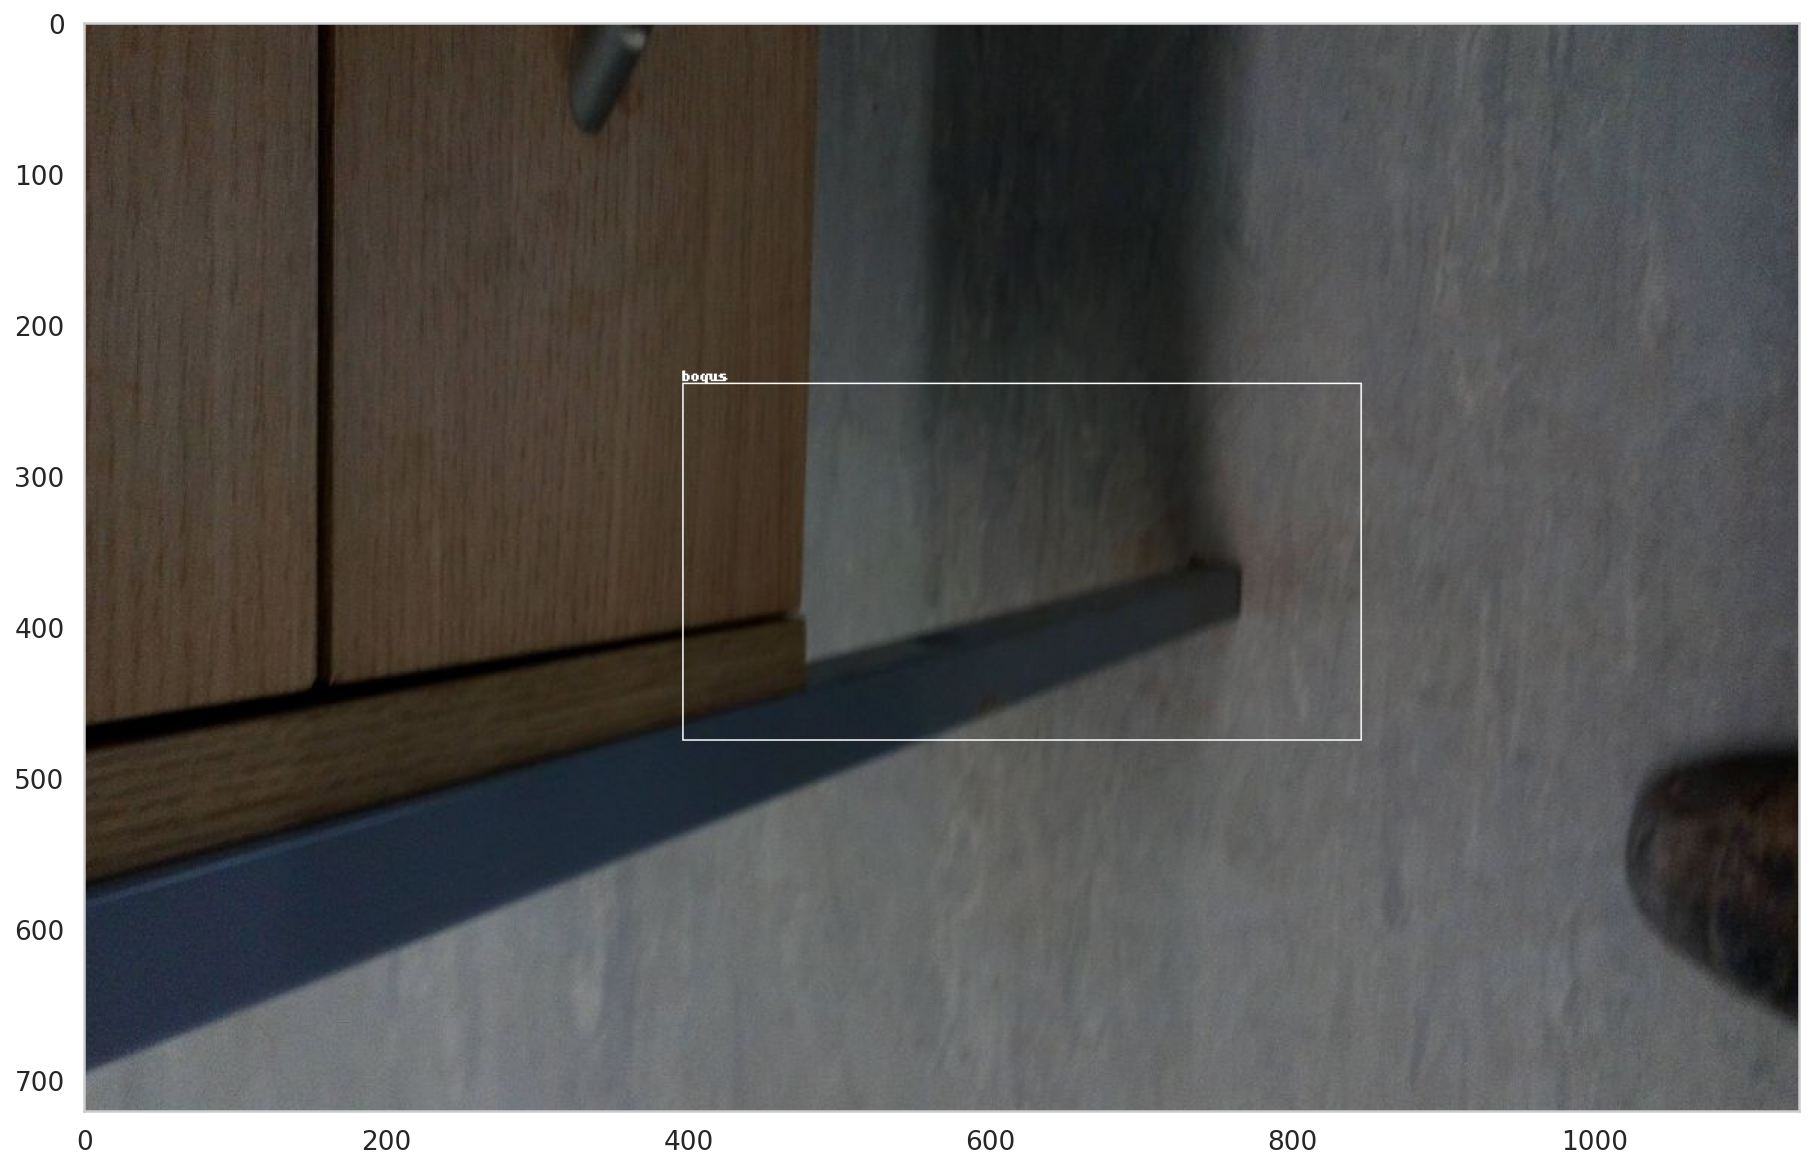

[   8.       1234.954168  546.18624  1363.176304  648.70632 ]
[ 13.      223.72511 662.8959  533.80817 799.94466]
[  13.        660.661813  703.11726  1003.632819  843.14466 ]
[  14.       1703.240581  337.61016  1903.934347  390.63816 ]
[  15.       1597.318072  397.70838  1918.        555.02442 ]
[  16.        937.857886  256.22082  1313.716838  729.9315  ]
[  17.       1491.397481  337.61016  1915.085599  684.05904 ]


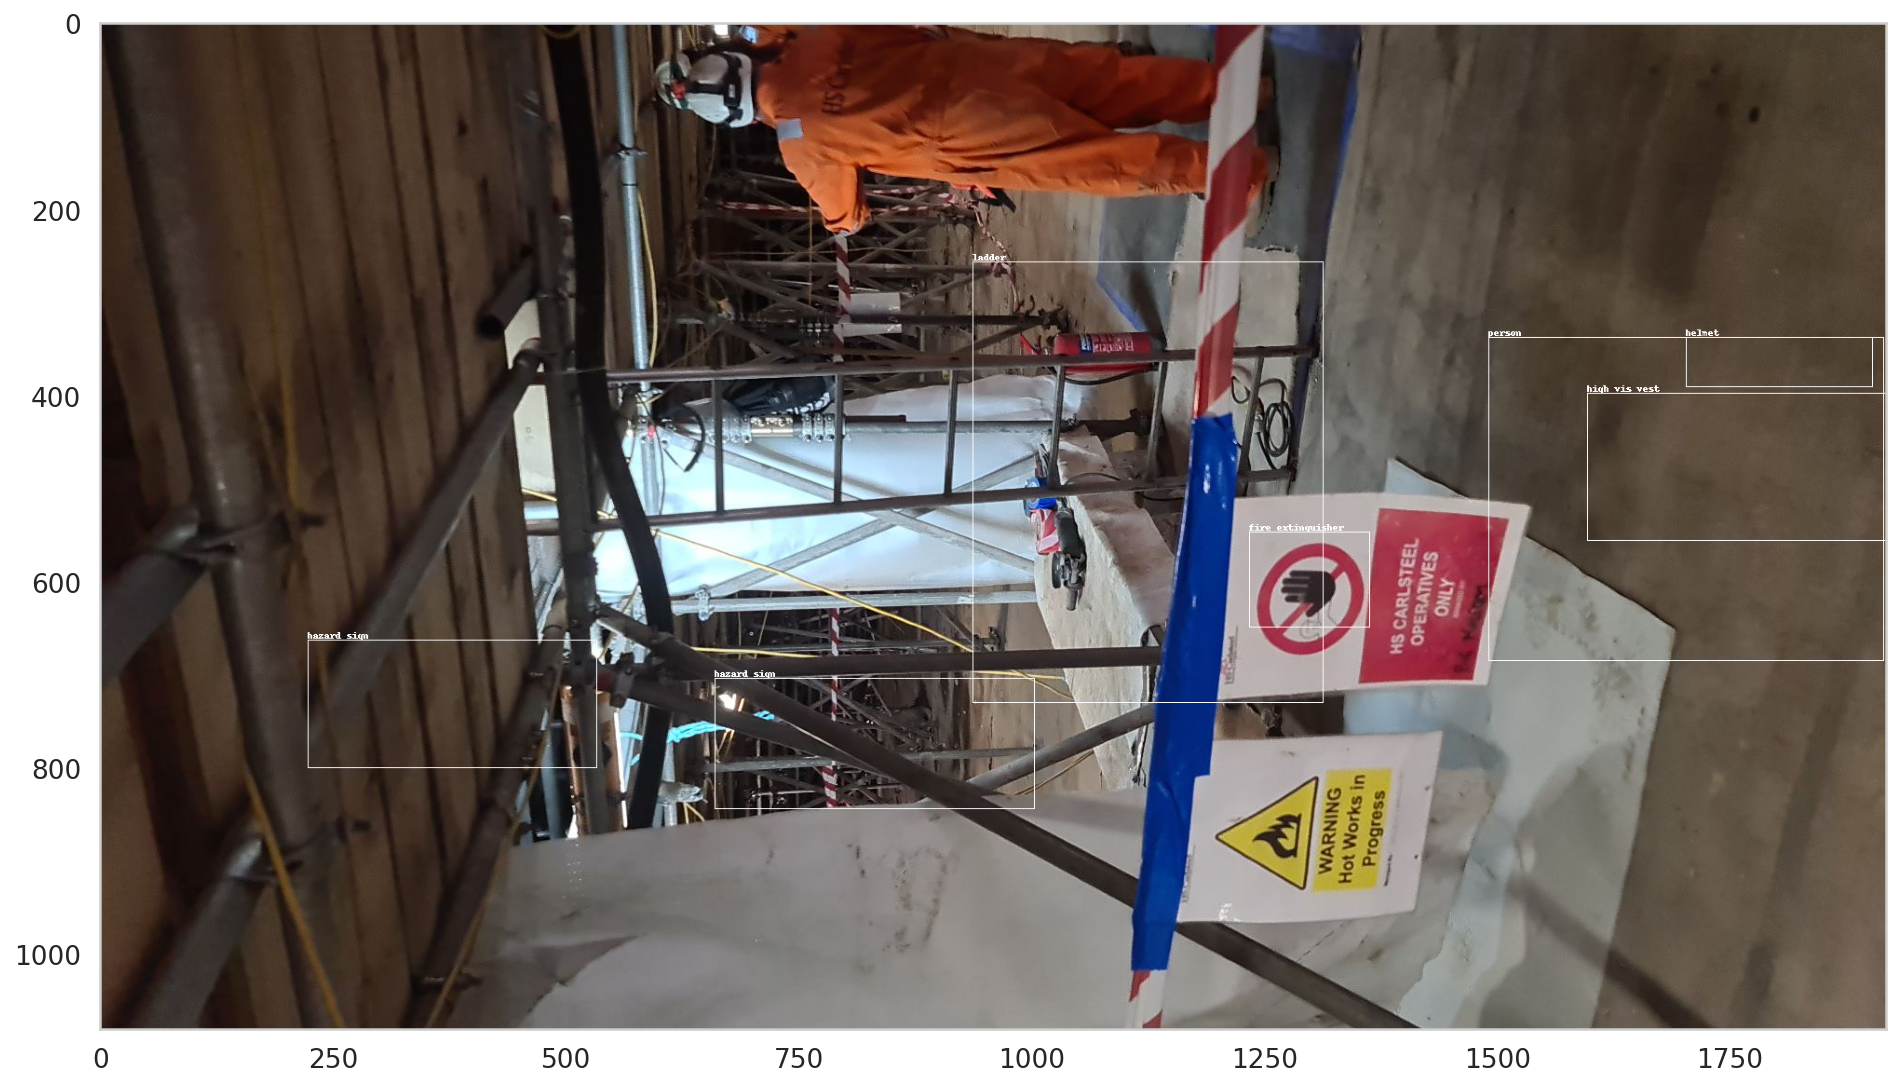

[   3.         326.4678     585.3967755  849.4038    1425.7266225]


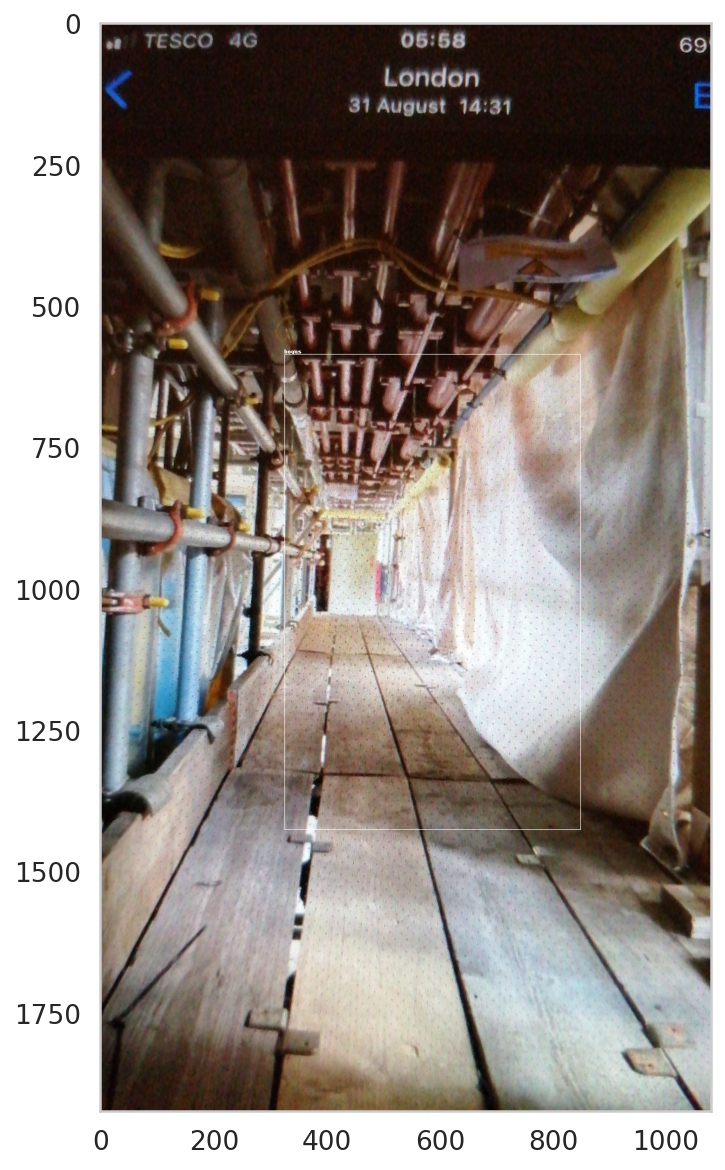

In [8]:
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image, mode='RGB')

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        print(ann)
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    im = plt.imshow(np.array(image))
    ax = plt.gca()
    ax.grid(False)
    plt.show()

def get_annotation_list(annotations):

  # Get any random annotation file 
  annotation_file = random.choice(annotations)
  # annotation_file = 'SA_dataset/01GM66A3M0G424C7VAR4J6C1YG.txt'
  with open(annotation_file, "r") as file:
      annotation_list = file.read().split("\n")
      annotation_list = [x.split(" ") for x in annotation_list]
      annotation_list = [[float(y) for y in x ] for x in annotation_list]

  #Get the corresponding image file
  image_file = annotation_file.replace("txt", "jpeg")
  assert os.path.exists(image_file)

  #Load the image
  image = Image.open(image_file)
  return image, annotation_list

for i in range(3):
  image, annotation_list = get_annotation_list(annotations)
  #Plot the Bounding Box
  plot_bounding_box(image, annotation_list)

In [9]:
def write_empty_txt_files():
    annotations = [os.path.join('SA_dataset', x) for x in os.listdir('SA_dataset') if x[-3:] == "txt"]
    images = [os.path.join('SA_dataset', x) for x in os.listdir('SA_dataset') if x[-4:] == "jpeg"]
    annotations.sort()
    images.sort()
    new_annotations = annotations.copy()
    for image in images:
        image_txt_sting = image[:-4] + 'txt'
        if image_txt_sting not in annotations:
            new_annotations.append(image_txt_sting)
            with open(image_txt_sting, 'w') as creating_new_txt_file: 
                pass 
    return new_annotations

annotations = write_empty_txt_files()
annotations.sort()

In [10]:
# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [11]:
!rm -r images annotations

rm: cannot remove 'images': No such file or directory
rm: cannot remove 'annotations': No such file or directory


In [12]:
!mkdir images annotations

In [13]:
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [14]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [15]:
!mv annotations labels

In [16]:
!python yolov5/train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 100 --data site_assist_data.yaml --weights yolov5s.pt --workers 24 --name yolo_road_det

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=site_assist_data.yaml, hyp=hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=yolov5/runs/train, name=yolo_road_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v